<a href="https://colab.research.google.com/github/Rabeet-Ahmed/Salary_Prediction_model_simple_Linear_Regression/blob/main/Salary_Prediction_model_simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Secure API key


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#!/bin/bash
!kaggle datasets download abhishek14398/salary-dataset-simple-linear-regression

Dataset URL: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
License(s): CC0-1.0
salary-dataset-simple-linear-regression.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/salary-dataset-simple-linear-regression.zip

Archive:  /content/salary-dataset-simple-linear-regression.zip
replace Salary_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/Salary_dataset.csv")

In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df.drop(columns=["Unnamed: 0"], axis=1,inplace=True)

In [ ]:
df.head(5)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [ ]:
df.shape

(30, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.rename(columns={"YearsExperience":"Experience"},inplace=True)

In [ ]:
df.head()

,Experience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


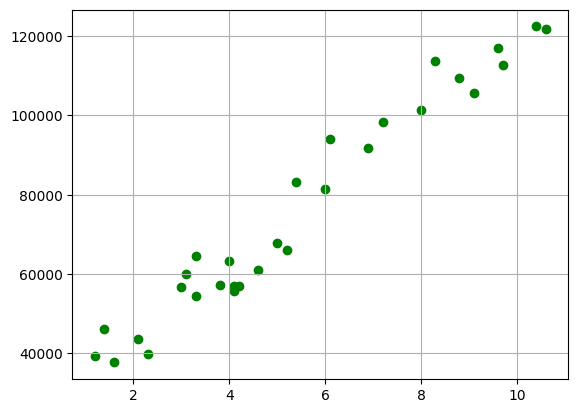

In [ ]:
plt.scatter(df["Experience"],df["Salary"],c="green")
plt.grid()
plt.show()


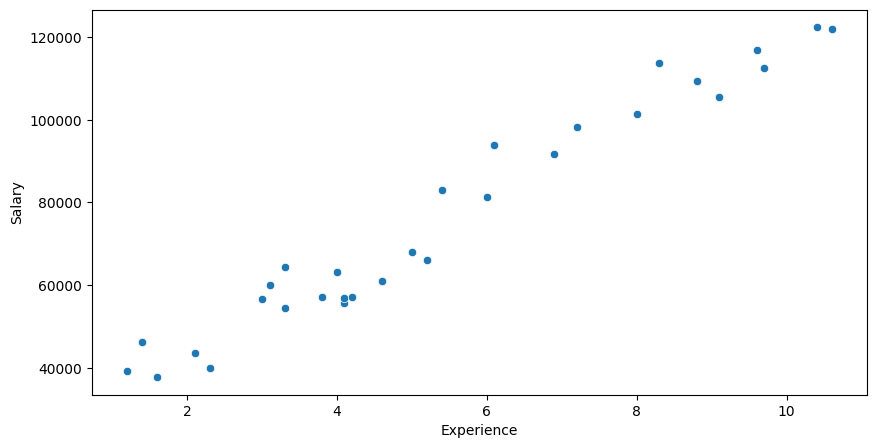

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Experience"],y=df["Salary"])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df["Experience"]
y = df["Salary"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)
X.shape, X_train.shape, X_test.shape

((30,), (21,), (9,))

In [ ]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
#-1 → Automatically determines the number of rows based on the length of the array.

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_train = lr.predict(X_train)
y_train
y_pred = lr.predict(X_test)
y_pred

array([ 36144.62176044,  34238.05465324,  66649.69547576,  59023.42704693,
        91435.06786946,  80948.94877982, 101921.1869591 ,  52350.44217171,
        42817.60663567])

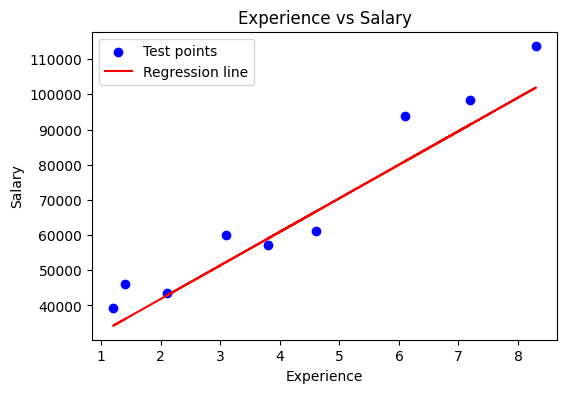

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test,y_test,c="blue",label="Test points")
plt.plot(X_test,y_pred,c="red",label="Regression line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score, accuracy_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [ ]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("R2:",r2)

MAE: 6974.465965919008
MSE: 64406629.38525959
RMSE: 8025.374096281094
R2: 0.9002142249159953


In [ ]:
m = lr.coef_

In [ ]:
b = lr.intercept_

In [ ]:
y_1 = m*1.4 +  b
y_1

array([36144.62176044])

In [ ]:
lr.predict(X_test[0].reshape(1,1))

array([36144.62176044])